# Katrina Multiple

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import adcircpy
from adcircpy.outputs import (
    Maxele,
    MaximumElevationTimes,
    Fort63,
    Fort61,
    Minpr,
    Maxwvel,
    Maxvel,
)
from sithom.plot import plot_defaults
from src.constants import KAT_EX_PATH, NO_BBOX, DATA_PATH

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [5]:
from src.models.generation import mult_folder_name

In [21]:
NO_BBOX.lon

[-92, -86.5]

In [22]:
NO_BBOX.lat

[28.5, 30.8]

In [26]:
@np.vectorize
def indices_in_bbox(lon, lat):
    return (
        lon > NO_BBOX.lon[0]
        and lon < NO_BBOX.lon[1]
        and lat > NO_BBOX.lat[0]
        and lat < NO_BBOX.lat[1]
    )


def max_index(values):
    

(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 3.7015398077287935
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 9.548758766044848
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 16.392498177424304
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
0
maxele 26.569324303483047
x -90.2028375361
y 30.033713521599996


Text(0.5, 0, 'Katrina windspeed multiple [dimensionless]')

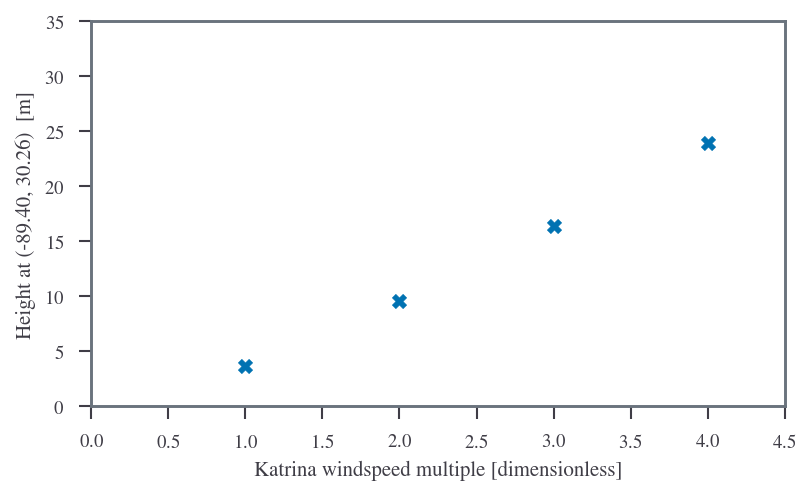

In [39]:
plot_defaults()
height_list = []
mult_list = [1, 2, 3, 4]

for i in mult_list:
    folder = mult_folder_name(i)
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    print(maxele.values.shape)
    print(maxele.x.shape)
    print(maxele.y.shape)
    print(maxele.triangles.shape)
    indices = indices_in_bbox(maxele.x, maxele.y)
    print(maxele.values[indices].shape)
    index = (-maxele.values[indices]).argmin()
    print(index)
    height_list.append(maxele.values[indices][27])
    print("maxele", maxele.values[indices][index])
    print("x", maxele.x[indices][index])
    print("y", maxele.y[indices][index])

plt.scatter(mult_list, height_list)
plt.ylabel("Height at (-89.40, 30.26)  [m]")
plt.xlim([0, 4.5])
plt.ylim([0, 35])
plt.xlabel("Katrina windspeed multiple [dimensionless]")

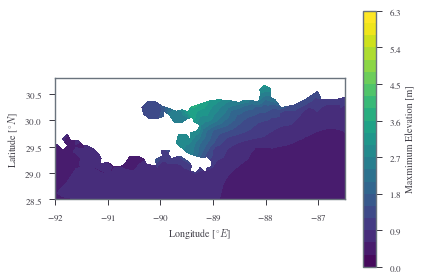

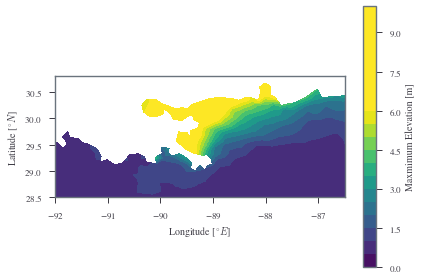

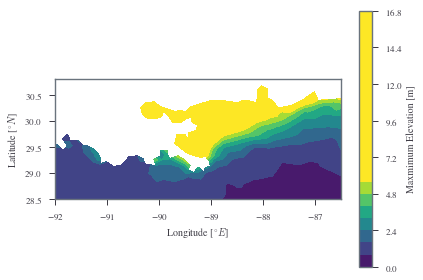

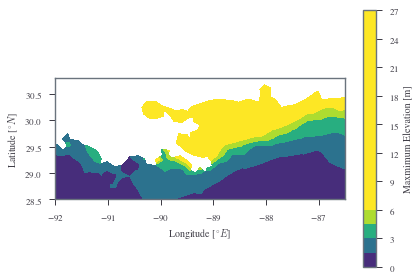

In [18]:
for i in [1, 2, 3, 4]:
    folder = mult_folder_name(i)
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    maxele.tricontourf(
        cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6
    )
    NO_BBOX.ax_lim(plt.gca())
    plt.xlabel("Longitude [$^{\circ}E$]")
    plt.ylabel("Latitude [$^{\circ}N$]")
    plt.show()

In [45]:
[mult_folder_name(x/4) for x in range(16) if x not in list(range(0, 16, 4))]

['/Users/simon/new-orleans/data/mult0.25',
 '/Users/simon/new-orleans/data/mult0.5',
 '/Users/simon/new-orleans/data/mult0.75',
 '/Users/simon/new-orleans/data/mult1.25',
 '/Users/simon/new-orleans/data/mult1.5',
 '/Users/simon/new-orleans/data/mult1.75',
 '/Users/simon/new-orleans/data/mult2.25',
 '/Users/simon/new-orleans/data/mult2.5',
 '/Users/simon/new-orleans/data/mult2.75',
 '/Users/simon/new-orleans/data/mult3.25',
 '/Users/simon/new-orleans/data/mult3.5',
 '/Users/simon/new-orleans/data/mult3.75']